In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

In [2]:
filtered_tracks =pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/test_data/datasets/filtered_tracks_final.pkl')
tracks_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/test_data/datasets/track_df_cleaned_final_full.pkl')

In [3]:
filtered_tracks.head()

,track_id,track_length,track_start,track_end,c3_peak,c2_peak,c1_peak,c3_peak_frame,c2_peak_frame,c1_peak_frame,...,max_distance_between_two_points,C3_adjusted_voxel_sum_positive,C2_adjusted_voxel_sum_positive,C1_adjusted_voxel_sum_positive,max_z_movement,max_y_movement,max_x_movement,dnm2_positive,actin_positive,membrane_region
22,22,8,0,7,268.426824,163.99004,233.000000,4,7,6,...,3.162278,True,True,True,1.0,1.0,3.0,False,False,Basal
65,65,8,0,7,345.835302,219.00000,418.333333,6,6,6,...,5.830952,True,True,True,5.0,1.0,3.0,True,True,Basal
93,93,8,0,7,308.000000,164.98317,225.000000,6,3,5,...,1.732051,True,True,True,1.0,1.0,1.0,False,False,Lateral
95,95,8,0,7,332.333333,196.00000,249.333333,6,7,7,...,13.379088,True,False,False,8.0,3.0,11.0,False,False,Lateral
100,100,22,0,21,257.000000,183.00000,508.000000,13,21,13,...,5.477226,True,False,False,3.0,3.0,5.0,False,True,Lateral


In [4]:
df = filtered_tracks.drop(columns=['track_id', 'track_start', 'track_end', 'c3_peak_frame', 'c2_peak_frame', 'c1_peak_frame'])

In [5]:
df = df[(df['dnm2_positive'] == True) | (df['actin_positive'] == True)]

In [6]:
df['max_z_movement'].dropna(inplace = True)

In [7]:
df.shape

(421, 18)

In [8]:
# List of categorical and numerical feature names
categorical_features = ['dnm2_positive', 'actin_positive', 'membrane_region', 'C3_adjusted_voxel_sum_positive', 'C2_adjusted_voxel_sum_positive', 'C1_adjusted_voxel_sum_positive']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Create a column transformer with appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # or use MinMaxScaler()
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [9]:
# Create a PCA object
pca = PCA(n_components=10)

# Create a pipeline that first preprocesses the data and then applies PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

# Fit and transform the data
principal_components = pipeline.fit_transform(df)

In [10]:
# Convert the principal components into a DataFrame for easier analysis
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.797752,0.751162,1.560960,-1.690974,2.147843,-0.099252,-0.793700,0.192632,1.369420,0.732431
1,-0.291516,0.466318,0.075607,1.224557,1.564728,-0.638124,-0.587207,0.153160,-1.544899,0.352144
2,-0.457333,1.550939,1.589223,-1.083435,1.388547,0.169604,-0.201714,1.078985,0.746225,0.456343
3,1.820707,-0.696252,0.305726,0.069859,0.250764,2.227588,0.081095,-1.564949,0.424670,0.679304
4,2.234469,1.404581,-2.533295,0.038921,-0.179253,0.134249,1.609748,0.694393,-1.668724,0.268773


In [11]:
# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.30822784 0.17431616 0.10272447 0.06562401 0.06061254 0.0553762
 0.03977923 0.0383902  0.03560528 0.02797815]


In [12]:
principal_df.shape

(421, 10)

In [13]:
# Add the max_z_movement column to your principal components DataFrame for ease of plotting
# Ensure indices match by resetting the index
principal_df = principal_df.reset_index(drop=True)
df = df.reset_index(drop=True)
principal_df['max_z_movement'] = df['max_z_movement']

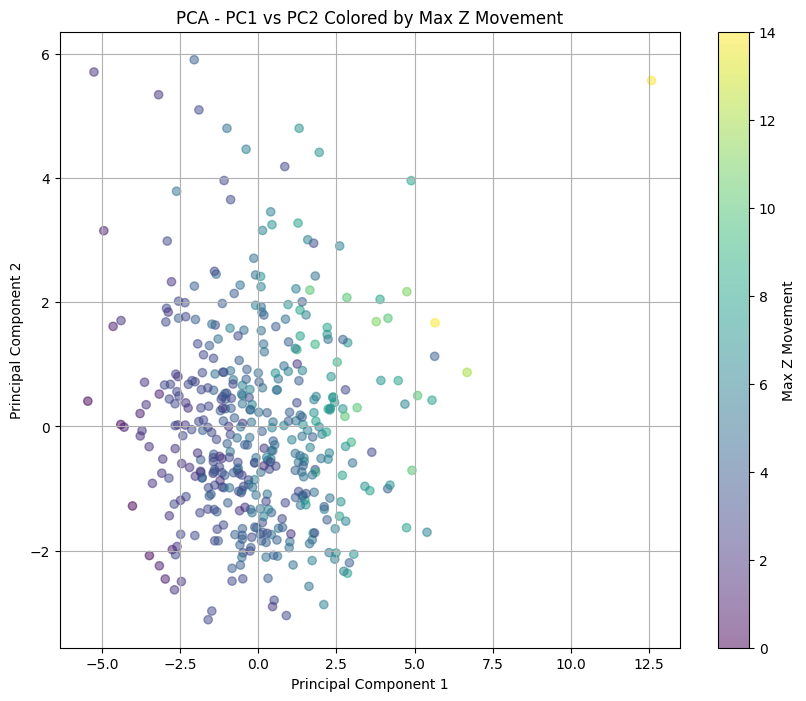

In [14]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['max_z_movement'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Max Z Movement')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2 Colored by Max Z Movement')
plt.grid(True)
plt.show()

In [26]:
principal_df['C2_adjusted_voxel_sum_positive'] = df['C2_adjusted_voxel_sum_positive']
principal_df['C1_adjusted_voxel_sum_positive'] = df['C1_adjusted_voxel_sum_positive']
principal_df['C3_adjusted_voxel_sum_positive'] = df['C3_adjusted_voxel_sum_positive']
principal_df['membrane_region'] =  df['membrane_region']


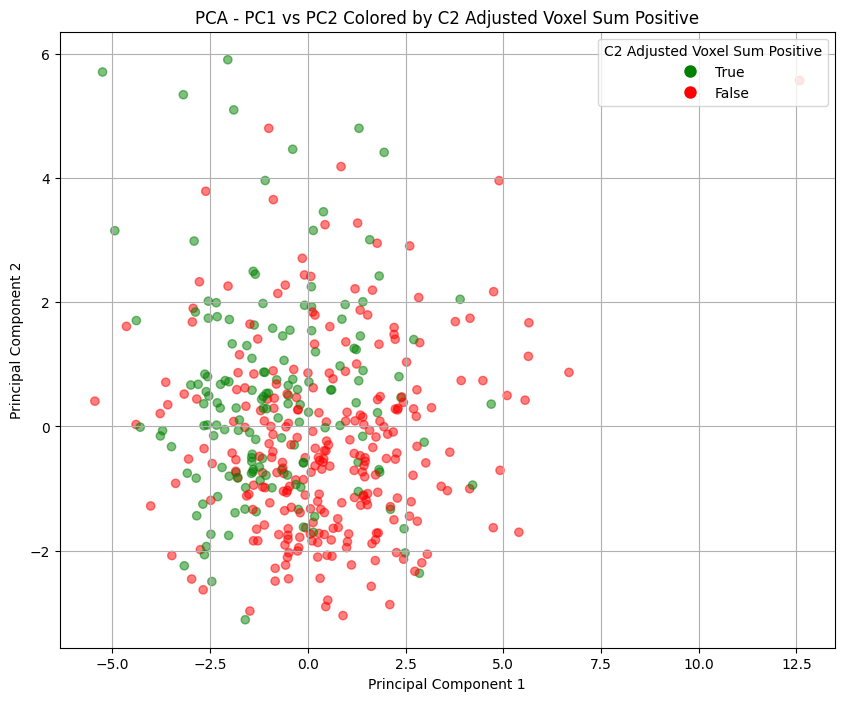

In [20]:
# Map boolean values to colors
color_map = {True: 'green', False: 'red'}
colors = principal_df['C2_adjusted_voxel_sum_positive'].map(color_map)

# Scatter plot with color mapping by C2_adjusted_voxel_sum_positive
plt.figure(figsize=(10, 8))
sc = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2 Colored by C2 Adjusted Voxel Sum Positive')
plt.grid(True)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='True'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False')]
plt.legend(title='C2 Adjusted Voxel Sum Positive', handles=handles, loc='upper right')

plt.show()


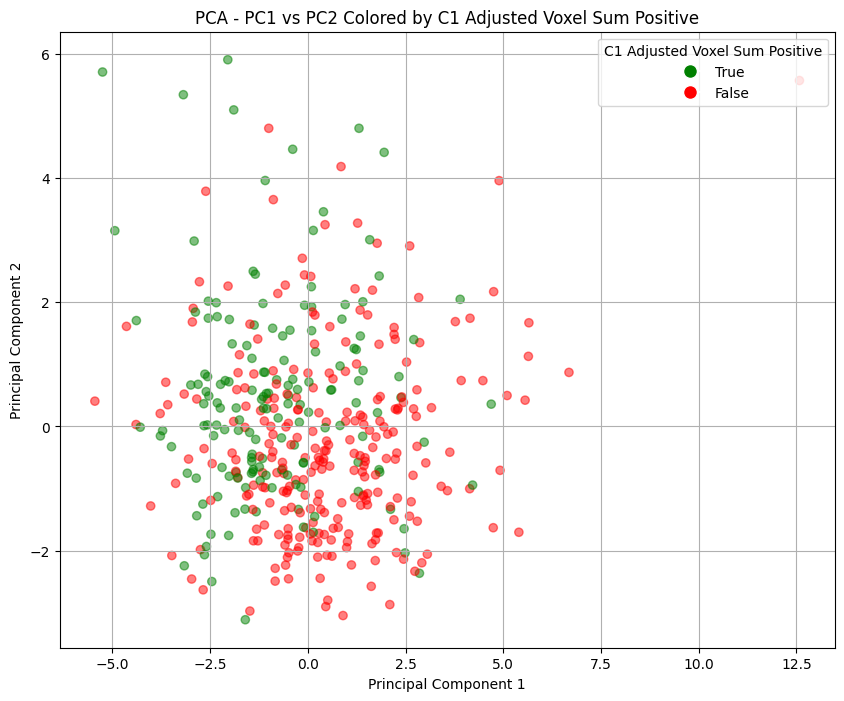

In [24]:
# Map boolean values to colors
color_map = {True: 'green', False: 'red'}
colors = principal_df['C1_adjusted_voxel_sum_positive'].map(color_map)

# Scatter plot with color mapping by C2_adjusted_voxel_sum_positive
plt.figure(figsize=(10, 8))
sc = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2 Colored by C1 Adjusted Voxel Sum Positive')
plt.grid(True)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='True'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False')]
plt.legend(title='C1 Adjusted Voxel Sum Positive', handles=handles, loc='upper right')

plt.show()


In [30]:
principal_df['membrane_region']

0        Basal
1      Lateral
2      Lateral
3      Lateral
4      Lateral
        ...   
416      Basal
417    Lateral
418    Lateral
419    Lateral
420     Apical
Name: membrane_region, Length: 421, dtype: object

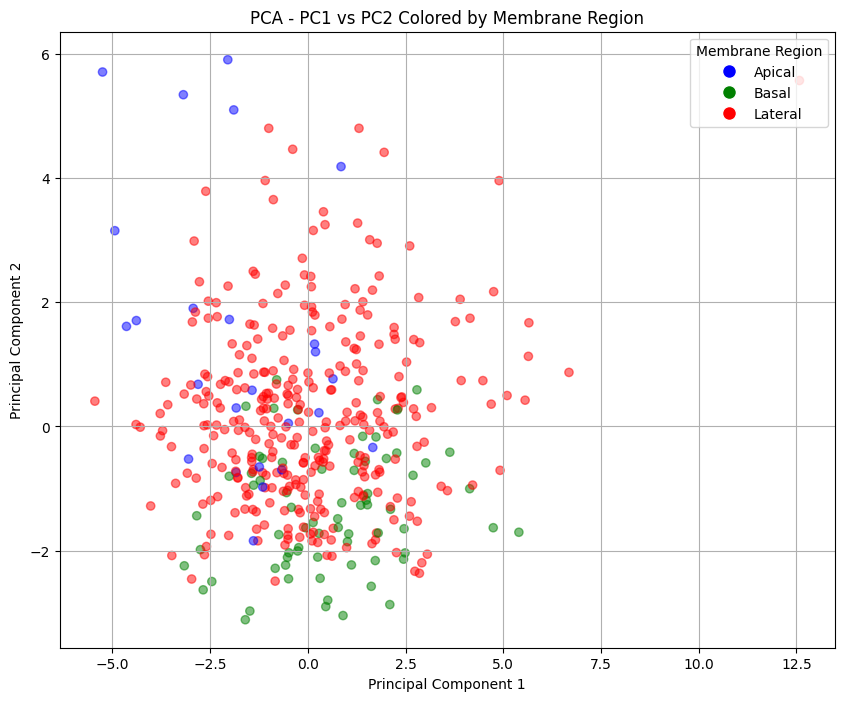

In [31]:
# Define a color map for the membrane regions
color_map = {'Apical': 'blue', 'Basal': 'green', 'Lateral': 'red'}
colors = principal_df['membrane_region'].map(color_map)

plt.figure(figsize=(10, 8))
sc = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2 Colored by Membrane Region')
plt.grid(True)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Apical'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Basal'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Lateral')]
plt.legend(title='Membrane Region', handles=handles, loc='upper right')

plt.show()


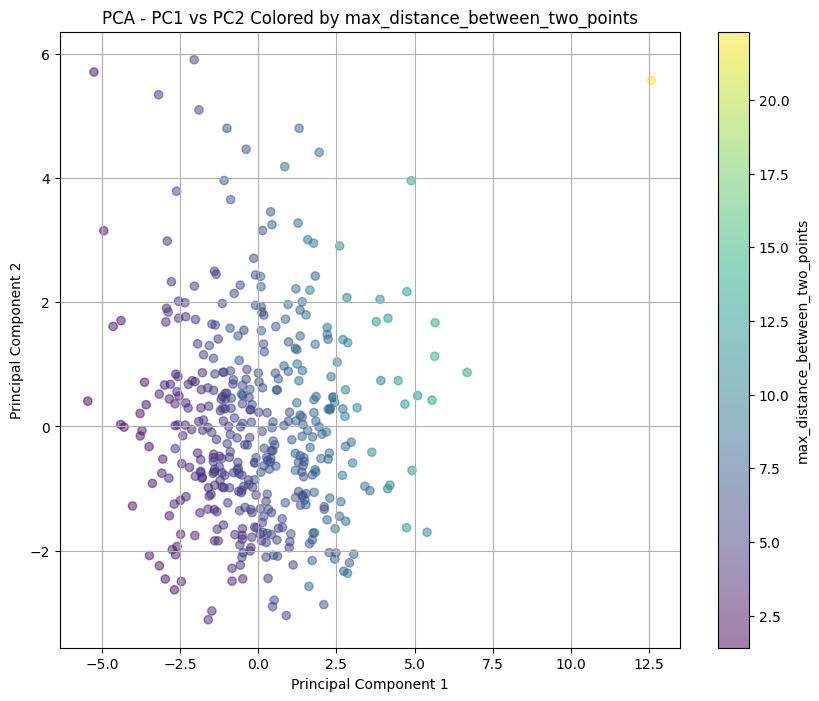

In [34]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['max_distance_between_two_points'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='max_distance_between_two_points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - PC1 vs PC2 Colored by max_distance_between_two_points')
plt.grid(True)
plt.show()